## Кластеризация

**Задача кластеризации** (clustering) — это задача, в которой мы разделяем данные на группы на основе признаков в данных.

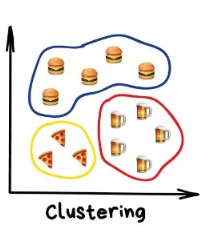

**Цель обучения** — построить модель, которая наилучшим образом объединит «похожие» объекты в группы.

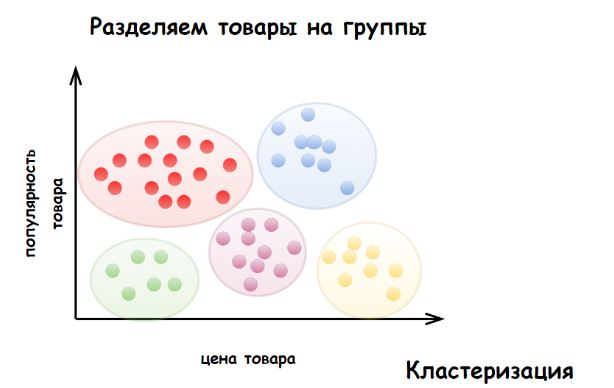

Типичные методы кластеризации при известном заранее количестве кластеров:
* метод k-средних (k-means);
* EM-алгоритм;
* агломеративная кластеризация.

**Математическая постановка** задачи кластеризации:

Задано множество объектов $X = \{x_1, x_2, .., x_m\}$ и множество меток кластеров $Y = \{y_1, y_2, .., y_m\}$, причём множество $Y$ конечно, т. е. $Y$ имеет ограниченный набор значений $Y = \{1, 2, .., k\}$, где $k$ — количество кластеров. Задана функция расстояния между двумя объектами $\rho(x_i, x_j)$.

Требуется разбить множество объектов на непересекающиеся подмножества (кластеры) так, чтобы каждый кластер состоял из объектов, близких по метрике $\rho(x_i, x_j)$ а объекты разных классов существенно отличались.

Разбиение производит некоторый алгоритм (модель) $a$, который каждому объекту ставит в соответствие кластер $y_i$ из множества $Y$, то есть $a : X \to Y$.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

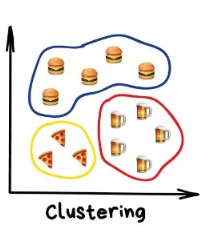

Координаты центроида - среднее значений по каждому признаку


### Алгоритм k-means

**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

$$
\begin{aligned}
V = \sum_{i=1}^k\sum_{x\in S_i}(x - \mu_i)^2
\end{aligned}
$$

Мы итерируемся по каждому кластеру и для всех векторов $x$ внутри кластера $S_i$ подсчитываем центроиды ($mu_i$). Далее рассчитываем разницу между каждым вектором $x$ кластера $S_i$ и центроидом кластера $S_i$. Необходимо, чтобы это значение, возведённое в квадрат ($V$), было минимальным для каждого кластера.

**Алгоритм** k-means:
1. Решаем, на сколько кластеров хотим разделить данные. Например, 3 ($k=3$)

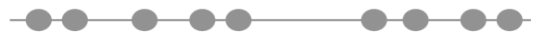

2. Cлучайным образом выбираем три объекта из датасета, они будут представлять три разных кластера (жёлтый, розовый и зелёный). Эти объекты будут считаться исходными центроидами кластеров.

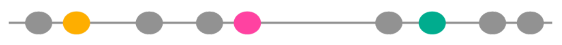

3. Распределим оставшиеся объекты датасета по трём кластерам. Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.

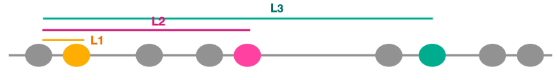
...
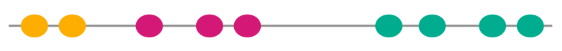

4. Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды и для удобства выделим их на рисунке вертикальной линией

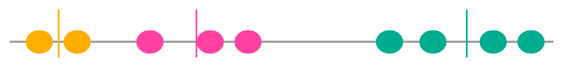

5. После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов. Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

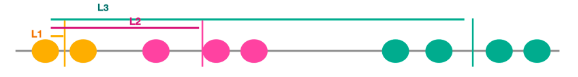

6. Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7
7. Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида

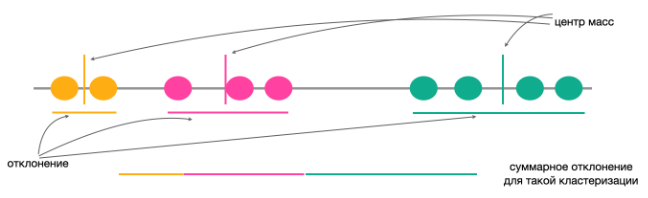

8. Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2. В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной (шесть оставшихся объектов будут принадлежать к зелёному кластеру). Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 

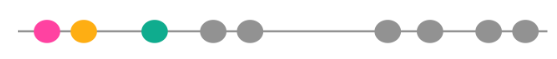

9. Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации. Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

**Несколько вариаций алгоритма k-means**:

НАЗВАНИЕ | ПРИНЦИП РАБОТЫ | ПОДРОБНОСТИ
--|--|--
K-MEANS	| Находит центроиды кластера как среднее значение координат. | [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (init='random')
K-MEANS++ | В классическом алгоритме k-means центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.Алгоритм k-means++ чуть «хитрее» и выбирает центроиды кластеров не совсем случайно. | [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (init='k-means++'; по умолчанию в sklearn при запуске k-means используется алгоритм k-means++)
K-MEDIANS | На этапе поиска центроидов кластера находит не среднее значение координат, а медиану. | [Документация](https://github.com/UBC-MDS/KMediansPy)
K-MEDOIDS | Работает так же, как k-medians, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера. | [Документация](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html)
FUZZY C-MEANS | Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью. | [Документация](https://github.com/omadson/fuzzy-c-means)

### Выбор оптимального k для алгоритма k-means

**Недостатки алгоритма**:
* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные;
* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо;
* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера:
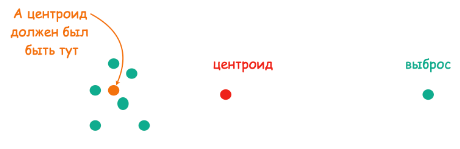
* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы:
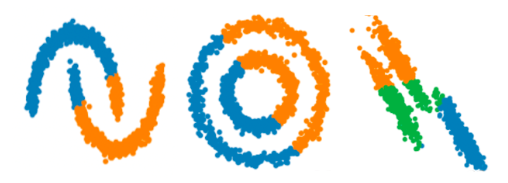
* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.


**Алгоритмы подбора k**:
* метод локтя (elbow plot);
* статистика разрыва (Gap Statistic Method);
* коэффициент силуэта (Average Silhouette Method).

**Метод локтя**

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

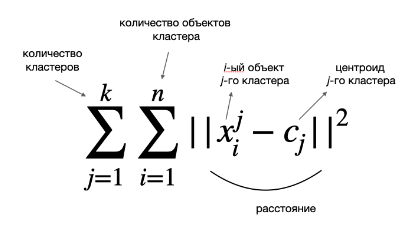

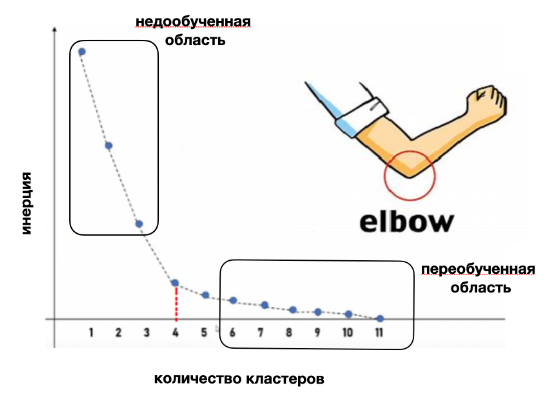

**Коэффициент силуэта**

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси x отложено количество кластеров, а по оси y — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

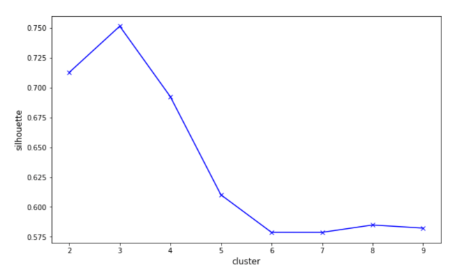

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

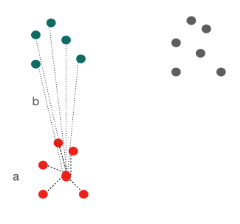

Возьмём красный кластер. Для объекта из красного кластера рассчитаем расстояние до каждого объекта в этом кластере (пусть это будет a). Далее для красного кластера найдём ближайший кластер. Посчитаем расстояние от того же объекта из красного кластера  до каждого объекта зелёного кластера (примем это значение за b).

Для каждой точки датасета рассчитывается значение силуэта:

$$
\begin{aligned}
s_i = \cfrac{(b_i - a_i)}{max(a_i, b_i)}
\end{aligned}
$$

Далее рассчитывается среднее значение силуэта для всего датасета.

### Метрики

Существует ряд метрик, которые можно подсчитать, если данные размечены:
* Однородность кластеров (homogeneity score);
* Полнота кластера (completeness score);
* V-мера (V-measure);
* Индекс Рэнда.

**Однородность кластеров (homogeneity score)**

Кластер считается **однородным**, если в нём содержатся объекты, принадлежащие только к одному кластеру.
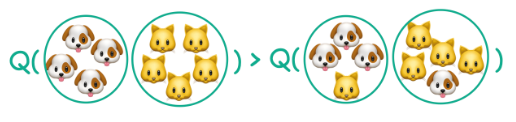

**Полнота кластера (completeness score)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру. Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере. Значение метрики уменьшается, если эталонный кластер разделить на части. 
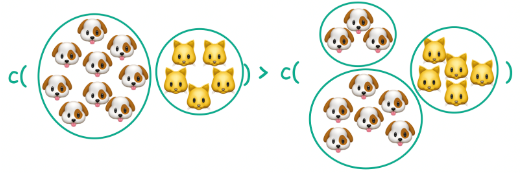

**V-мера (V-measure)**

Эта метрика — комбинация метрик полноты и однородности. Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.
$$
\begin{aligned}
v = \cfrac{(1 + \beta) * homogeneity * completeness}{\beta * homogeneity + completeness}
\end{aligned}
$$

По умолчанию $\beta = 1$, но это значение можно варьировать, если хочется дать разный вес разным свойствам:
* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta < 1$;
* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда $\beta > 1$.

**Индекс Рэнда**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.
$$
\begin{aligned}
Rand index = \cfrac{number of agreeing pairs}{number of pairs}
\end{aligned}
$$

где *number of pairs* — общее количество пар, *number of agreeing pairs* — количество пар, для которых предсказание и истинные значения совпали.

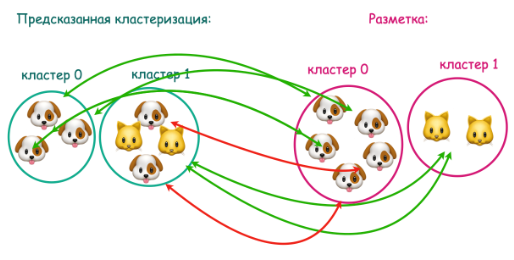


МЕТРИКА	| ИНТЕРПРЕТАЦИЯ И ПРИМЕНЕНИЕ | ДИАПАЗОН ЗНАЧЕНИЙ | ФУНКЦИЯ В МОДУЛЕ METRICS БИБЛИОТЕКИ SKLEARN
--|--|--|--
Однородность (homogeneity score) | Показывает, насколько однородны получившиеся кластеры. Если в кластере оказались элементы из другого кластера, значение метрики уменьшается. | 1 — идеально однородные кластеры; 0 — кластеры максимально разнородные.	| homogeneity_score
Полнота (completeness score) | Показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру. | 1 — идеальное значение; 0 — объекты, которые должны образовывать один кластер, разделились на большее количество кластеров.	 | completeness_score
V-мера (V-measure)	 | Комбинация метрик полноты и однородности кластеров.	 | 1 — идеально полные и однородные кластеры; 0 — полученные кластеры неоднородные, количество кластеров слишком большое. | v_measure_score
Индекс Рэнда | Показывает долю объектов датасета, которые мы правильно определили в кластер. | 1 — все объекты в предсказанном кластере попали в правильные кластеры. | rand_score


### Популярные алгоритмы кластеризации:
* иерархической кластеризацией;
* EM-алгоритмами кластеризации;
* спектральной кластеризацией;
* кластеризацией на основе плотности.

### Иерархическая кластеризация

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

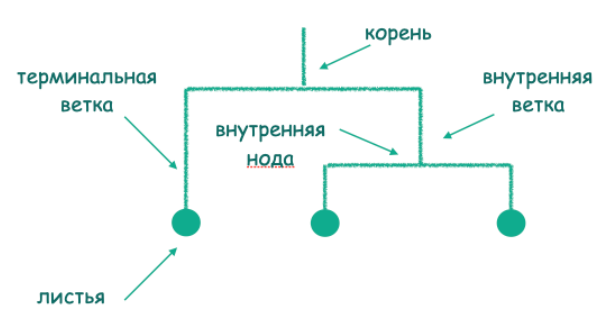

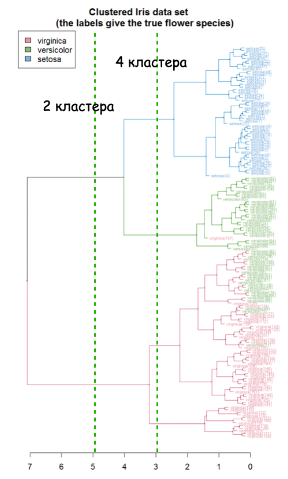

**Два подхода**: 
* **агломеративный** - кластеры образуются снизу вверх;
* **дивизионный** - сверху вниз, в ходе деления крупных кластеров.

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами.

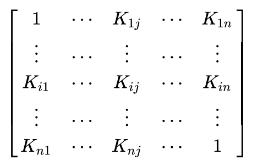, K — это мера сходства между двумя кластерами

МЕТОД |	ИДЕЯ| ФОРМУЛА | ВИЗУАЛИЗАЦИЯ ПОДХОДА
--|--|--|--
Метод одиночной связи (single linkage) | Поиск минимального расстояния между объектами из разных кластеров. | Расстояние между двумя кластерами (A и B) рассчитывается по формуле: $min{d(a,b): a \in A, b \in B}$ | 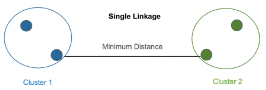
Метод полной связи (complete (maximum) linkage) | Поиск максимального расстояния между объектами из разных кластеров. | Расстояние между двумя кластерами (A и B): $max{d(a,b): a \in A, b \in B}$ | 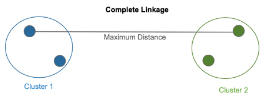
Метод средней связи (pair group method using arithmetic mean) | Расстояние между двумя кластерами считается как среднее от расстояния между двумя элементами этих кластеров. | Расстояние между двумя кластерами (A и B): $\cfrac{1}{\|A\|*\|B\|}\sum_{a \in A}\sum_{b \in B}d(a,b)$ | 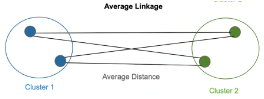
Центроидный метод (centroid) | Расстояния между кластерами рассчитываются как расстояния между центроидами этих кластеров. | Расстояние между двумя кластерами (A и B): $d = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$. Координаты центроида кластера A: $p = (p_1, p_2)$. Координаты центроида B: $p = (q_1, q_2)$. | 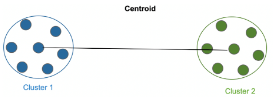

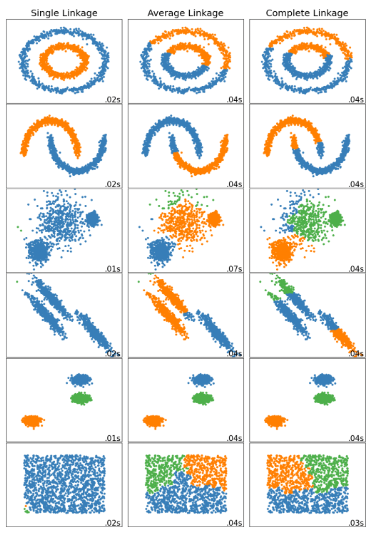

**Преимущества:**
* Можно построить дендрограмму и понять, как устроены данные;
* Работает на небольшом датасете.

**Недостатки:**
* Необходимость выбора оптимального количества кластеров;
* Если данных много, дендрограмма становится большой и сложной для понимания;
* Может неравномерно разделять данные на кластеры.

### EM-алгоритмы кластеризации

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью

Один из примеров **EM (Expectation-maximization)-алгоритма** — это k-means-кластеризация, рассмотренная нами ранее.

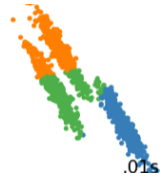

Когда данные распределены в форме вытянутых эллипсов, алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

**Преимущества:**
* Можно построить дендрограмму и понять, как устроены данные;
* Работает на небольшом датасете.

**Недостатки:**
* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM;
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

### Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

**Алгоритм**:
1. Создаём граф, количество вершин которого равняется количеству объектов в датасете. Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине. 

    Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

    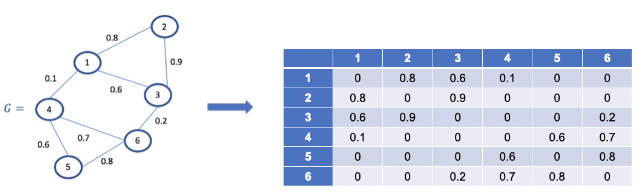

2. Проводим некоторые математические преобразования этой матрицы для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

    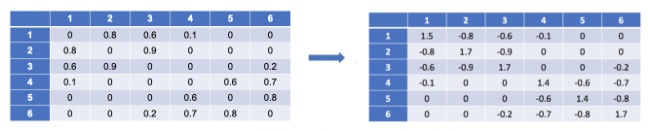

3. Уменьшаем размерность данных.

    Теперь одна вершина описывается одним признаком.

    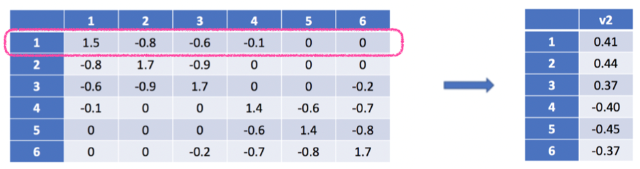

4. Проводим кластеризацию матрицы с уменьшенной размерностью. Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. 

    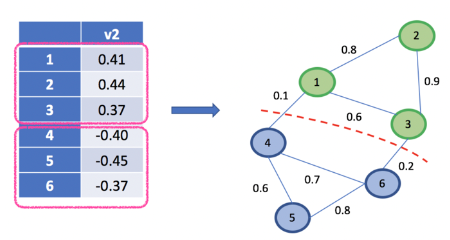

**Преимущества:**
* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности;
* Эффективна для кластеризации разрежённых данных;
* Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков (худший результат на вытянутом элипсе):
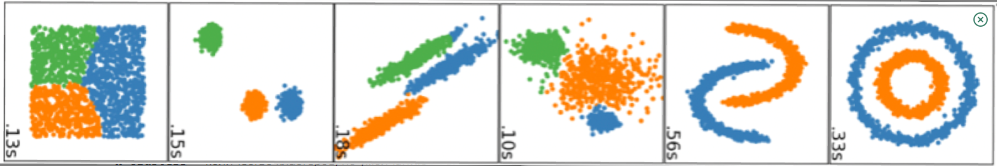

**Недостатки:**
* Нужно заранее задавать количество кластеров;
* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

### Кластеризация на основе плотности

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

**DBSCAN** (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

**Алгоритм**:
1. Сначала необходимо выбрать случайный объект в данных и в некотором радиусе r от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

    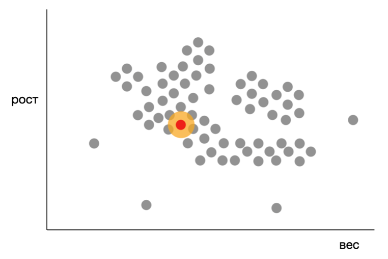

    Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

    Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

    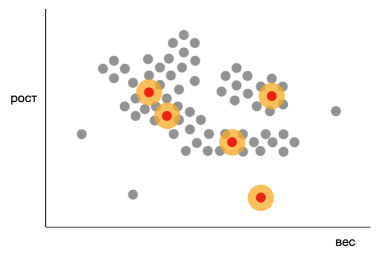

2. Выделим **центральные точки (core points)** - точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

    В наших данных четыре выделенные точки будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей. Находим центральные точки во всём датасете:

    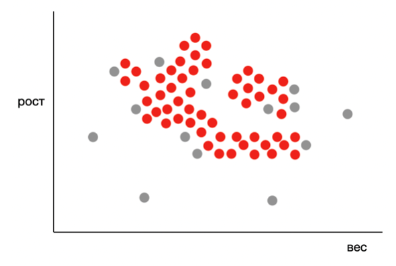

3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

    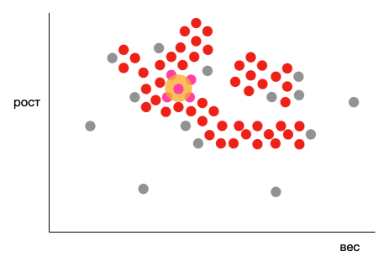

    Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

    Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

    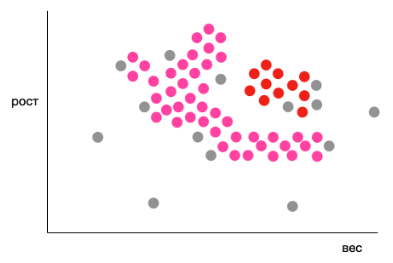

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе r от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

    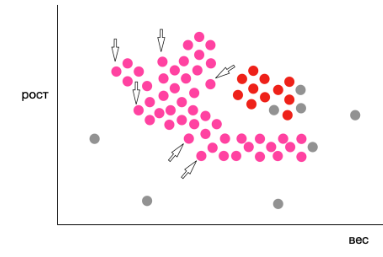

5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

    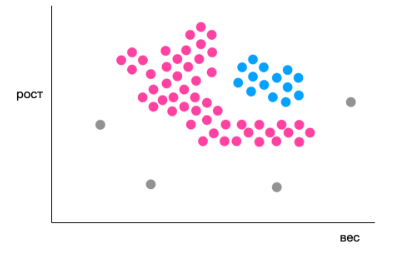

    Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.


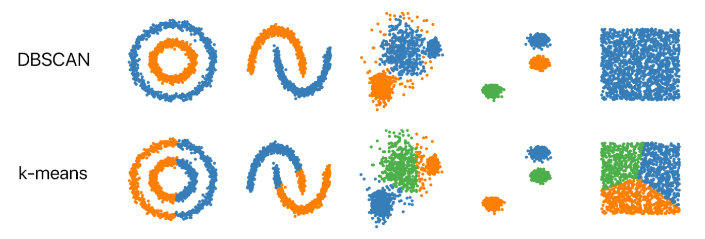

**Преимущества**:
* В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное;
* Хорошо работает с данными произвольной формы;
* Отлично справляется с выбросами в датасетах.

**Недостатки**:
* Не может качественно кластеризовать наборы данных с большой разницей в плотности;
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным;
* Бывает сложно подобрать eps.

### Сравнение алгоритмов кластеризации

АЛГОРИТМ | ПРИНЦИП РАБОТЫ | ПРЕИМУЩЕСТВА | НЕДОСТАТКИ
--|--|--|--
Иерархическая кластеризация	 | Строит дерево (иерархию) вложенных кластеров. | * позволяет построить дендрограмму кластеризации и тем самым лучше проанализировать данные; <br> * позволяет найти иерархию в данных. | * необходимо выбирать оптимальное количество кластеров; <br> * неравномерное распределение кластеров; <br> *работает на небольшом датасете.
EM-кластеризация (модель гауссовой смеси) | Предполагает, что любое наблюдение принадлежит ко всем кластерам, но с разной вероятностью.	 | * хорошо работает на данных в форме эллипса, окружности, на перекрывающихся данных;<br> * устойчив к шуму в данных; <br> * работает быстро при удачном выборе начальных кластеров. | * необходимо выбирать оптимальное количество кластеров; <br> * работает долго при неудачном выборе кластеров.
Спектральная кластеризация	| Снижает размерность данных, а затем применяет более простые алгоритмы кластеризации, например k-means.| * подходит для кластеризации данных с большим количеством признаков; <br> * эффективен для кластеризации разрежённых данных; <br> * хорошо работает на практически любых распределениях данных. | * необходимо выбирать оптимальное количество кластеров; <br> * подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.
Кластеризация на основе плотности	| Находит в датасете области с высокой плотностью и, основываясь на этом, образует кластеры. | * нет необходимости выбирать оптимальное количество кластеров; <br> * устойчив к шуму и выбросам. | * не способен качественно кластеризовать наборы данных с большой разницей в плотности; <br> * иногда бывает сложно подобрать параметры для моделирования.

### Основные способы визуализации

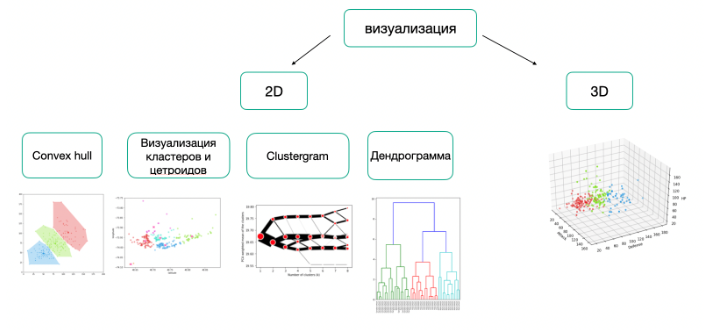

**Популярные способы визуализации**:
* диаграмма рассеяния для двухмерного и трёхмерного случаев;

    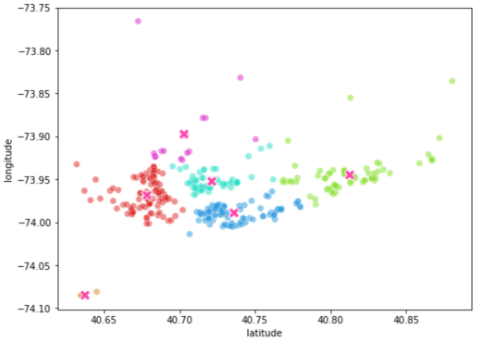

* Convex Hull, или выпуклая оболочка;

    **Выпуклая оболочка (Convex Hull)** множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры

    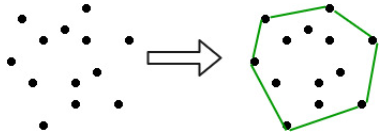

    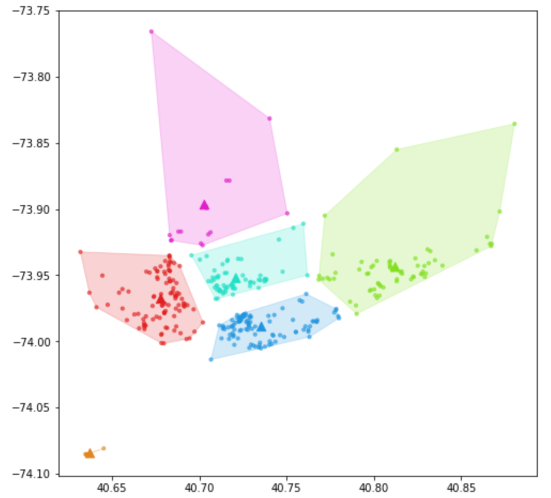

* дендрограмма;

    Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

    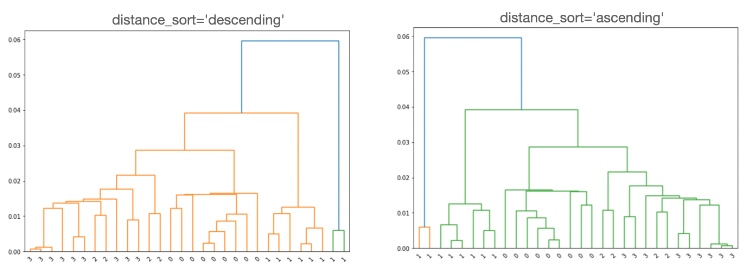

* Clustergram

    Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

    Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. 

    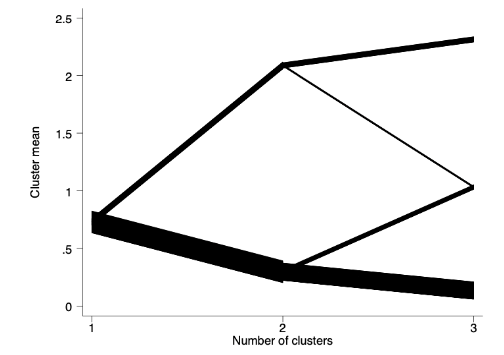

СПОСОБ ВИЗУАЛИЗАЦИИ	| КЛАСТЕРИЗАЦИЯ	| ЦЕЛИ ВИЗУАЛИЗАЦИИ
--|--|--
2D-визуализация (Диаграмма рассеяния) | Любые алгоритмы кластеризации, отработавшие на двухмерном пространстве признаков.|Быстро визуально оценить результаты кластеризации.
2D-визуализация (Convex Hull) | Любые алгоритмы кластеризации, отработавшие на двухмерном пространстве признаков. | Понять размеры получившихся кластеров, оценить количество выбросов в кластерах и похожесть объектов внутри кластера.
2D-визуализация (Дендрограмма)	| Иерархическая кластеризация на двухмерном пространстве признаков.	Визуализировать, как датасет делился на кластеры, оценить схожесть кластеров. | С помощью дендрограммы можно оценивать, какое количество кластеров будет оптимальным.
2D-визуализация (Clustergram)	| K-means, GMM и иерархическая кластеризация. Применима для n-мерного пространства признаков.	| Понять, как датасет делится на различное количество кластеров, оценить, насколько равномерные кластеры были образованы.
3D-визуализация (Matplotlib) | Любые алгоритмы кластеризации, отработавшие на трёхмерном пространстве признаков. | Быстро визуально оценить результаты кластеризации.
3D-визуализация (Plotly) | Любые алгоритмы кластеризации, отработавшие на трёхмерном пространстве признаков. | Быстро визуально оценить результаты кластеризации в интерактивном режиме.

## [Практика](./tasks/pokemon_clusterization.ipynb)

## [Визуализация](./tasks/airbnb_clustering_visualization.ipynb)